In [2]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
#import seaborn as sns           # visualization package 2
from datetime import datetime
import copy
import ast
from collections import Counter
import itertools
#import nltk
from ast import literal_eval
import pandas_profiling

#clustering
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import silhouette_score

import time

    
    

# so images get plotted in the notebook
%matplotlib inline

In [8]:
df = pd.read_csv('patents_data_cleaned_all_years_new_3.csv')

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,City,Inv_to_Assignee_ratio,Patents,State,Year,assignee_IPC_A,assignee_IPC_B,...,pt_statutory invention registration,pt_utility,Rank,assignee_patent_annual_sum,inventor_patent_annual_sum,inventor_patents_perc,assignee_patents_perc,inventor_rank,assignee_pats_citations_normalized,inventor_pats_citations_normalized
0,0,0,0,New York,0.055923,4077,NY,1976,0.121036,0.157771,...,0.0,0.955359,0,36052,26340,0.008656,0.113087,11,0.110902,0.006969
1,1,1,1,Washington,0.021840,1511,DC,1976,0.055236,0.136544,...,0.0,0.998676,1,36052,26340,0.001253,0.041912,217,0.025431,0.000980
2,2,2,2,Pittsburgh,0.296154,1300,PA,1976,0.024614,0.216699,...,0.0,0.987692,2,36052,26340,0.014617,0.036059,1,0.039576,0.015354
3,3,3,3,Chicago,0.305112,1252,IL,1976,0.136054,0.242282,...,0.0,0.922524,3,36052,26340,0.014503,0.034728,2,0.036265,0.013285
4,4,4,4,Stamford,0.118511,1021,CT,1976,0.077848,0.200633,...,0.0,0.948090,4,36052,26340,0.004594,0.028320,34,0.019938,0.005009


In [10]:
df_1976 = df.loc[df.Year == 1976]
df_2014 = df.loc[df.Year == 2014]

In [18]:
df_2014_clean = df_2014.drop(['Patents','inventor_patents','Rank', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Year',
                              'assignee_patent_annual_sum', 'assignee_pats_cited', 'inventor_patent_annual_sum',
                             'inventor_patents_perc', 'inventor_pats_citations_normalized',
                             'pt_statutory invention registration', 'assignee_type_9'], axis = 1)

In [19]:
pandas_profiling.ProfileReport(df_2014_clean)

Number of variables,38
Number of observations,1000
Total Missing (%),0.1%
Total size in memory,297.0 KiB
Average record size in memory,304.1 B
Numeric,33
Categorical,2
Boolean,1
Date,0
Text (Unique),1
Rejected,1


In [22]:
df_2014.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Inv_to_Assignee_ratio,Patents,Year,assignee_IPC_A,assignee_IPC_B,assignee_IPC_C,assignee_IPC_D,...,pt_statutory invention registration,pt_utility,Rank,assignee_patent_annual_sum,inventor_patent_annual_sum,inventor_patents_perc,assignee_patents_perc,inventor_rank,assignee_pats_citations_normalized,inventor_pats_citations_normalized
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38499.500000,38499.500000,38499.500000,3.008080,168.30900,2014.0,0.193168,0.162606,0.124424,0.005874,...,0.0,0.878648,499.500000,168309.0,240981.0,0.001000,0.001000,497.647000,0.001000,0.001000
std,288.819436,288.819436,288.819436,4.546215,516.55276,0.0,0.186976,0.156147,0.155581,0.021501,...,0.0,0.172898,288.819436,0.0,0.0,0.002566,0.003069,287.525646,0.003584,0.003022
min,38000.000000,38000.000000,38000.000000,0.000000,14.00000,2014.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,168309.0,240981.0,0.000000,0.000083,0.000000,0.000000,0.000000
25%,38249.750000,38249.750000,38249.750000,0.708491,22.00000,2014.0,0.044233,0.045996,0.000000,0.000000,...,0.0,0.848228,249.750000,168309.0,240981.0,0.000141,0.000131,248.000000,0.000056,0.000071
50%,38499.500000,38499.500000,38499.500000,1.572362,42.00000,2014.0,0.146175,0.116490,0.057119,0.000000,...,0.0,0.942005,499.500000,168309.0,240981.0,0.000373,0.000250,499.000000,0.000144,0.000254
75%,38749.250000,38749.250000,38749.250000,3.376242,104.00000,2014.0,0.287026,0.236294,0.197464,0.000000,...,0.0,1.000000,749.250000,168309.0,240981.0,0.000876,0.000618,747.000000,0.000512,0.000728
max,38999.000000,38999.000000,38999.000000,54.944444,6747.00000,2014.0,1.000000,0.863014,0.868056,0.208904,...,0.0,1.000000,999.000000,168309.0,240981.0,0.041572,0.040087,988.000000,0.048229,0.044003


In [21]:
df_2014_clean.loc[df_2014_clean.City == 'San Jose']

,City,Inv_to_Assignee_ratio,State,assignee_IPC_A,assignee_IPC_B,assignee_IPC_C,assignee_IPC_D,assignee_IPC_E,assignee_IPC_F,assignee_IPC_G,...,inventor_IPC_H,inventor_pats_cited,inventor_pats_cited_ratio,pt_design,pt_plant,pt_reissue,pt_utility,assignee_patents_perc,inventor_rank,assignee_pats_citations_normalized
38001,San Jose,1.774039,CA,0.044477,0.034426,0.013903,0.000315,0.001471,0.0159,0.363031,...,0.46238,382828,38.214015,0.010094,0.000177,0.0,0.989729,0.033551,0,0.044475


In [23]:
df_2014_clean.shape

(1000, 37)

In [35]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90);
    plt.yticks(range(len(corr.columns)), corr.columns);

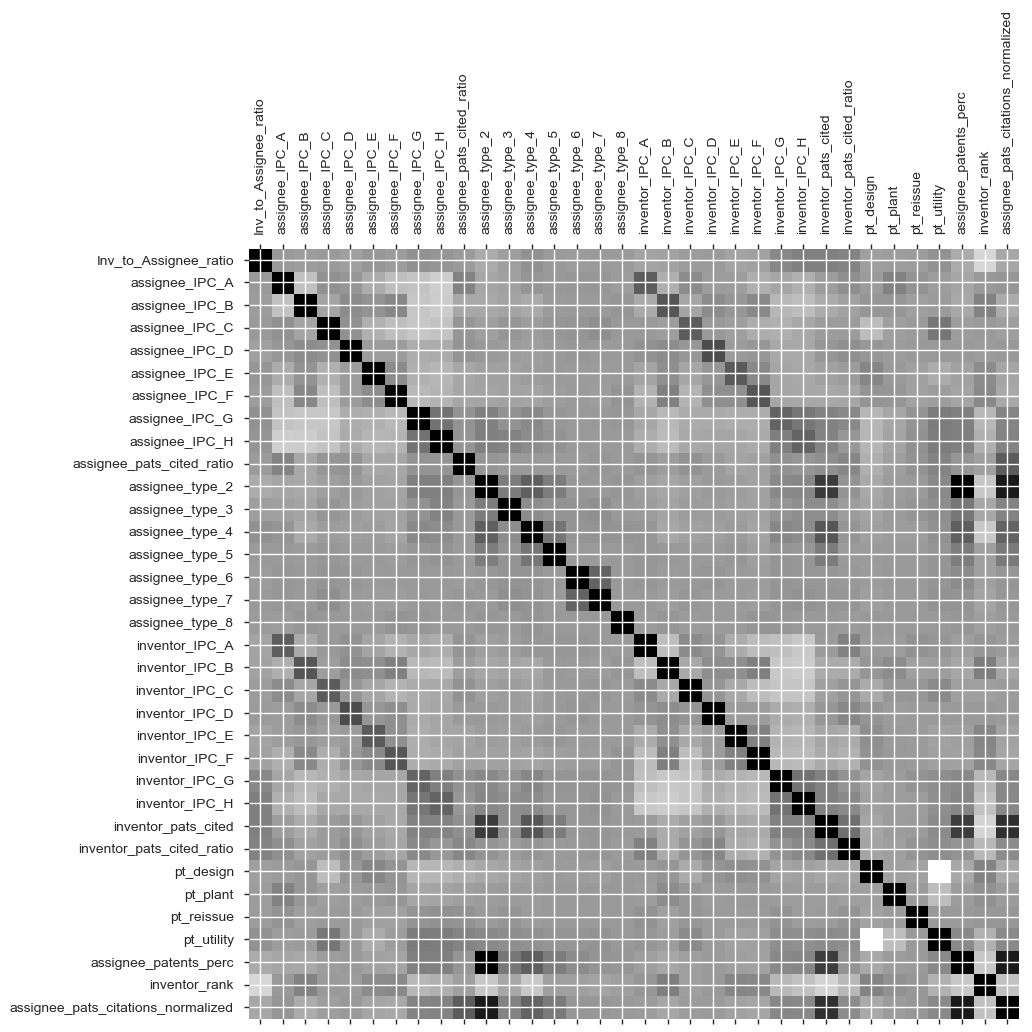

In [36]:
plot_corr(df_2014_clean)